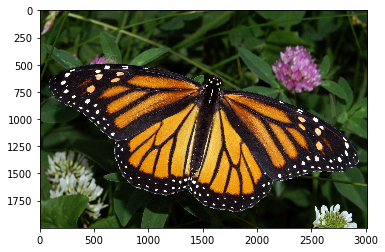

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

image = cv2.imread('images/monarch.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [2]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


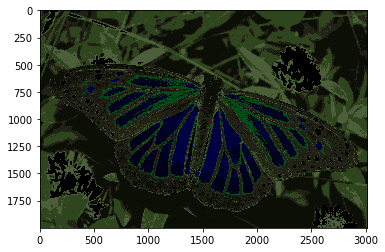

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS +cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
k=9
retval,labels,centers = cv2.kmeans(pixel_vals,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
centers = np.int8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0],image.shape[1])
plt.imshow(segmented_image)

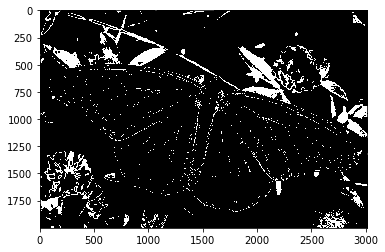

In [5]:
plt.imshow(labels_reshape==0, cmap='gray')

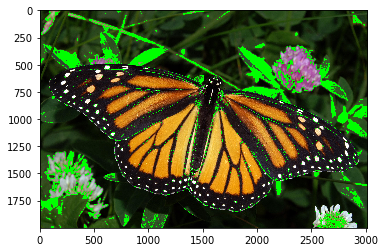

In [6]:
cluster = 0
masked_image = np.copy(image)
masked_image[labels_reshape == cluster] = [0, 255, 0]
plt.imshow(masked_image)